# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [4]:
print(lats)

[-15.75099723  80.60519882  46.49255776 ... -31.1416517  -87.98763025
  40.09732513]


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
#url = # YOUR CODE HERE 
#url = 'https://api.openweathermap.org/data/2.5/weather?lat=' + lat + '&lon=' + lon + '&appid=' + weather_api_key
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "standard"


'''Not set up to do params? '''
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']
 
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | mattawa
Processing Record 4 of Set 1 | imbituba
Processing Record 5 of Set 1 | sola
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | sao felix do xingu
Processing Record 10 of Set 1 | fort beaufort
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | garmsar
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | san felipe
Processing Record 16 of Set 1 | banda aceh
Processing Record 17 of Set 1 | cheuskiny
City not found. Skipping...
Processing Record 18 of Set 1 | altay
Processing Record 19 of Set 1 | pacifica
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,300.35,67,5,2.87,MV,1669944488
1,norman wells,65.2820,-126.8329,259.17,78,100,4.63,CA,1669944488
2,mattawa,46.7379,-119.9028,272.15,93,72,0.85,US,1669944489
3,imbituba,-28.2400,-48.6703,295.60,95,74,5.15,BR,1669944489
4,sola,-13.8833,167.5500,301.39,75,50,6.61,VU,1669944489


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,300.35,67,5,2.87,MV,1669944488
1,norman wells,65.2820,-126.8329,259.17,78,100,4.63,CA,1669944488
2,mattawa,46.7379,-119.9028,272.15,93,72,0.85,US,1669944489
3,imbituba,-28.2400,-48.6703,295.60,95,74,5.15,BR,1669944489
4,sola,-13.8833,167.5500,301.39,75,50,6.61,VU,1669944489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

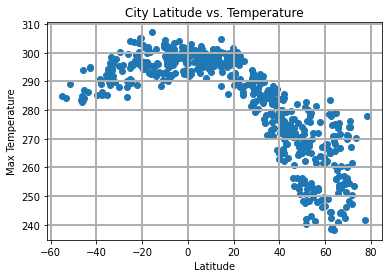

<Figure size 432x288 with 0 Axes>

In [56]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

plt.show()



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

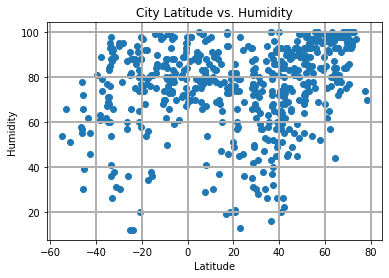

<Figure size 432x288 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

x_values2 = city_data_df['Lat']
y_values2 = city_data_df['Humidity']
plt.scatter(x_values2,y_values2)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

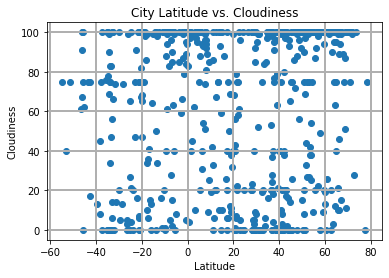

<Figure size 432x288 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

x_values3 = city_data_df['Lat']
y_values3 = city_data_df['Cloudiness']
plt.scatter(x_values3,y_values3)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

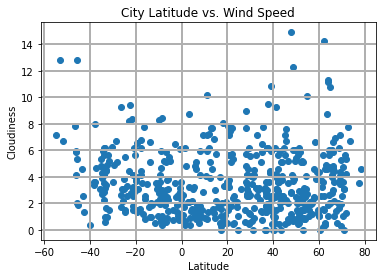

<Figure size 432x288 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

x_values4 = city_data_df['Lat']
y_values4 = city_data_df['Wind Speed']
plt.scatter(x_values4,y_values4)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
0      290.943154
1      266.092321
2      273.087196
3      301.369022
4      295.953644
          ...    
548    303.057643
549    293.061786
550    270.926318
551    280.117603
552    275.725612
Name: Lat, Length: 553, dtype: float64
y = -0.38x +290.72


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0 , :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,norman wells,65.2820,-126.8329,259.17,78,100,4.63,CA,1669944488
2,mattawa,46.7379,-119.9028,272.15,93,72,0.85,US,1669944489
5,vardo,70.3705,31.1107,274.14,86,100,1.03,NO,1669944490
6,qaanaaq,77.4840,-69.3632,241.54,74,0,3.52,GL,1669944490
7,nemuro,43.3236,145.5750,271.93,45,2,5.16,JP,1669944490


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <=0 , :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,300.35,67,5,2.87,MV,1669944488
3,imbituba,-28.2400,-48.6703,295.60,95,74,5.15,BR,1669944489
4,sola,-13.8833,167.5500,301.39,75,50,6.61,VU,1669944489
8,sao felix do xingu,-6.6447,-51.9950,295.55,97,15,0.60,BR,1669944491
9,fort beaufort,-32.7748,26.6338,291.92,92,66,0.97,ZA,1669944491


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.714467429613594


/Users/nicolettealbright/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


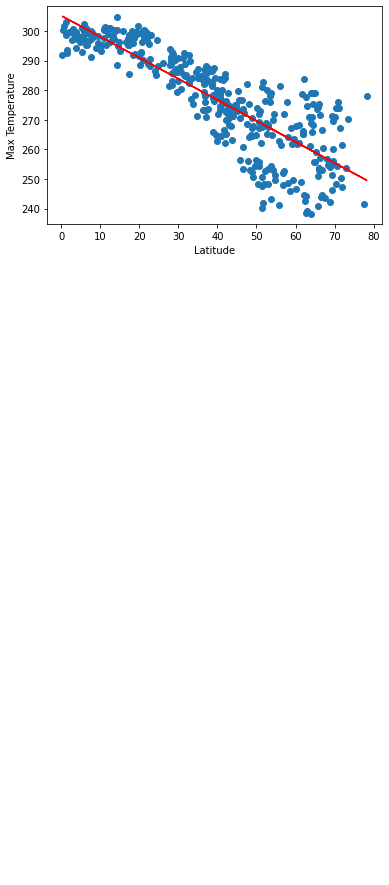

In [39]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_valuesN = northern_hemi_df['Lat']
y_valuesN = northern_hemi_df['Max Temp']

plt.scatter(x_valuesN,y_valuesN)

(slopeN, intercepN, rvalueN, pvalueN, stderrN) = stats.linregress(x_valuesN, y_valuesN)
regress_valuesN = x_valuesN * slopeN + intercepN
line_eqN = "y = " + str(round(slopeN,2)) + "x +" + str(round(intercepN,2))


plt.plot(x_valuesN,regress_valuesN,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# Label plot and annotate the line equation

plt.annotate(line_eqN,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalueN**2}")

# Show plot
plt.tight_layout()
plt.show()

The r-value is: 0.36414768171040984


/Users/nicolettealbright/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


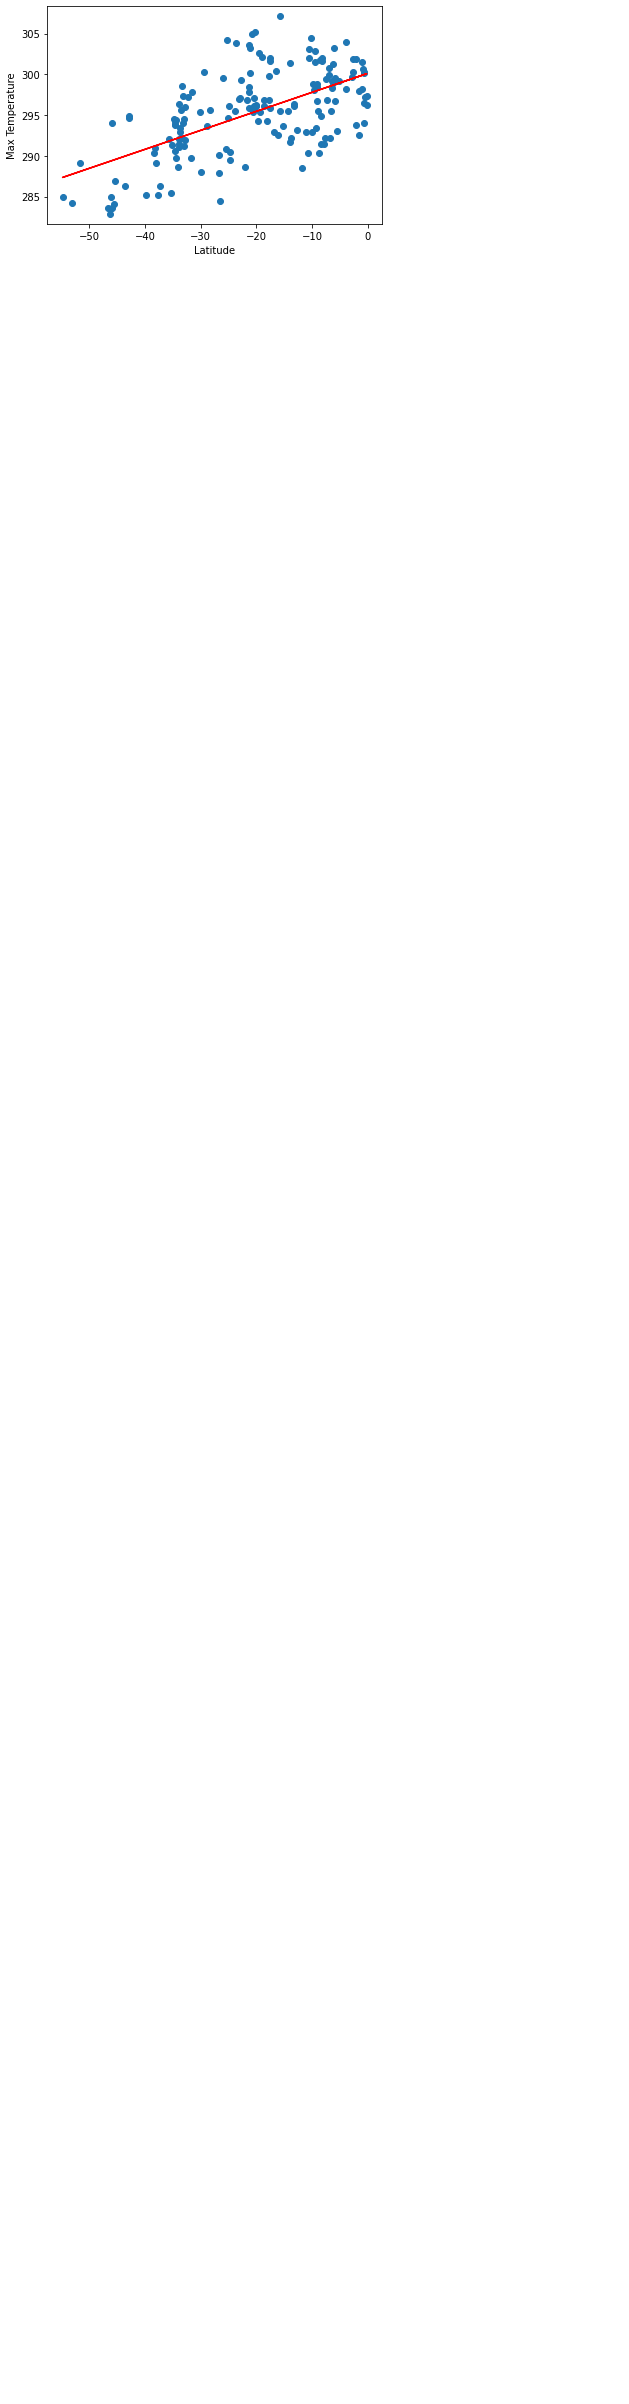

In [40]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_valuesS = southern_hemi_df['Lat']
y_valuesS = southern_hemi_df['Max Temp']

plt.scatter(x_valuesS,y_valuesS)

(slopeS, intercepS, rvalueS, pvalueS, stderrS) = stats.linregress(x_valuesS, y_valuesS)
regress_valuesS = x_valuesS * slopeS + intercepS
line_eqS = "y = " + str(round(slopeS,2)) + "x +" + str(round(intercepS,2))


plt.plot(x_valuesS,regress_valuesS,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# Label plot and annotate the line equation

plt.annotate(line_eqS,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalueS**2}")

# Show plot
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** There is definitly a coorelation between the lattitude and max temperature. In the northrn hemisphere this appears to be a strong negative coorelation (as latitude increases, temperature decreases), where ar the southern hemisphere this is the opposite (as latitude increaes, temperature increases). This makes sense as the hottest point is near the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07831419477765897


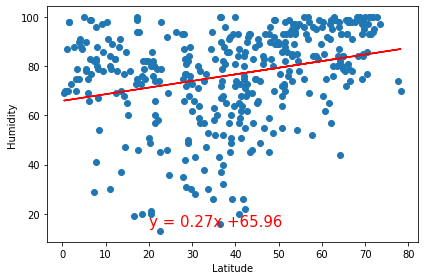

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
x_valuesN1 = northern_hemi_df['Lat']
y_valuesN1 = northern_hemi_df['Humidity']

plt.scatter(x_valuesN1,y_valuesN1)

(slopeN1, intercepN1, rvalueN1, pvalueN1, stderrN1) = stats.linregress(x_valuesN1, y_valuesN1)
regress_valuesN1 = x_valuesN1 * slopeN1 + intercepN1
line_eqN1 = "y = " + str(round(slopeN1,2)) + "x +" + str(round(intercepN1,2))


plt.plot(x_valuesN1,regress_valuesN1,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Label plot and annotate the line equation

plt.annotate(line_eqN1,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalueN1**2}")

# Show plot
plt.tight_layout()
plt.show()

The r-value is: 0.11842220514147485


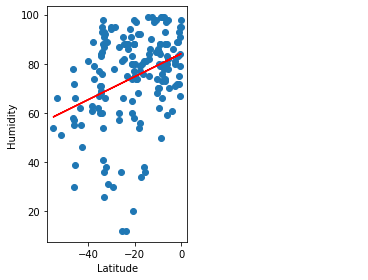

In [51]:
# Southern Hemisphere
# YOUR CODE HERE

x_valuesS1 = southern_hemi_df['Lat']
y_valuesS1 = southern_hemi_df['Humidity']

plt.scatter(x_valuesS1,y_valuesS1)

(slopeS1, intercepS1, rvalueS1, pvalueS1, stderrS1) = stats.linregress(x_valuesS1, y_valuesS1)
regress_valuesS1 = x_valuesS1 * slopeS1 + intercepS1
line_eqS1 = "y = " + str(round(slopeS1,2)) + "x +" + str(round(intercepS1,2))


plt.plot(x_valuesS1,regress_valuesS1,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Label plot and annotate the line equation

plt.annotate(line_eqS1,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalueS1**2}")

# Show plot
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** There is a vague positive coorelation between the lattitude and and humidity in both hemispheres. In the northrn hemisphere this is a slightly stronger coorelation (humidity increases slightly more with lattitude than in the southern hemisphere), but neighther trend is a significantly stong (i.e. r-value) as the linear relation ships of hemisphere with temperature. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0265998586546717


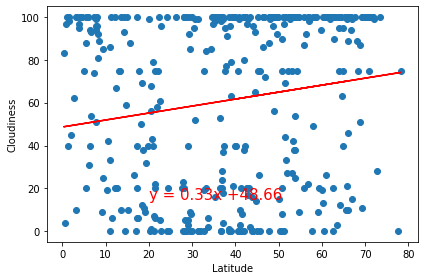

In [52]:
# Northern Hemisphere
# YOUR CODE HERE
x_valuesN2 = northern_hemi_df['Lat']
y_valuesN2 = northern_hemi_df['Cloudiness']

plt.scatter(x_valuesN2,y_valuesN2)

(slopeN2, intercepN2, rvalueN2, pvalueN2, stderrN2) = stats.linregress(x_valuesN2, y_valuesN2)
regress_valuesN2 = x_valuesN2 * slopeN2 + intercepN2
line_eqN2 = "y = " + str(round(slopeN2,2)) + "x +" + str(round(intercepN2,2))


plt.plot(x_valuesN2,regress_valuesN2,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Label plot and annotate the line equation

plt.annotate(line_eqN2,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalueN2**2}")

# Show plot
plt.tight_layout()
plt.show()

The r-value is: 0.04979687476940867


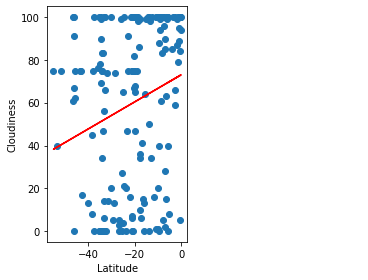

In [53]:
# Southern Hemisphere
x_valuesS2 = southern_hemi_df['Lat']
y_valuesS2 = southern_hemi_df['Cloudiness']

plt.scatter(x_valuesS2,y_valuesS2)

(slopeS2, intercepS2, rvalueS2, pvalueS2, stderrS2) = stats.linregress(x_valuesS2, y_valuesS2)
regress_valuesS2 = x_valuesS2 * slopeS2 + intercepS2
line_eqS2 = "y = " + str(round(slopeS2,2)) + "x +" + str(round(intercepS2,2))


plt.plot(x_valuesS2,regress_valuesS2,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Label plot and annotate the line equation

plt.annotate(line_eqS2,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalueS2**2}")

# Show plot
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** Similar to the linear relations ship among hemisphere and humidity, there is also a vague positive coorelation between the lattitude and and cloudiness in both hemispheres. I guess this makes sense that this mirrors the humidity trend since clouds are made of moisture. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00885757318023526


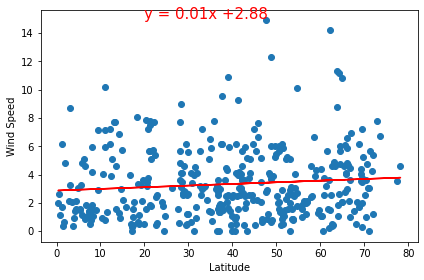

In [54]:
# Northern Hemisphere
# YOUR CODE HERE
x_valuesN3 = northern_hemi_df['Lat']
y_valuesN3 = northern_hemi_df['Wind Speed']

plt.scatter(x_valuesN3,y_valuesN3)

(slopeN3, intercepN3, rvalueN3, pvalueN3, stderrN3) = stats.linregress(x_valuesN3, y_valuesN3)
regress_valuesN3 = x_valuesN3 * slopeN3 + intercepN3
line_eqN3 = "y = " + str(round(slopeN3,2)) + "x +" + str(round(intercepN3,2))


plt.plot(x_valuesN3,regress_valuesN3,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Label plot and annotate the line equation

plt.annotate(line_eqN3,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalueN3**2}")

# Show plot
plt.tight_layout()
plt.show()

The r-value is: 0.12572120972698184


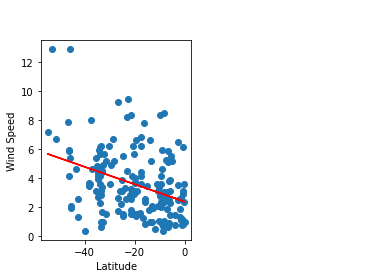

In [55]:
# Southern Hemisphere
# YOUR CODE HERE
x_valuesS3 = southern_hemi_df['Lat']
y_valuesS3 = southern_hemi_df['Wind Speed']

plt.scatter(x_valuesS3,y_valuesS3)

(slopeS3, intercepS3, rvalueS3, pvalueS3, stderrS3) = stats.linregress(x_valuesS3, y_valuesS3)
regress_valuesS3 = x_valuesS3 * slopeS3 + intercepS3
line_eqS3 = "y = " + str(round(slopeS3,2)) + "x +" + str(round(intercepS3,2))


plt.plot(x_valuesS3,regress_valuesS3,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Label plot and annotate the line equation

plt.annotate(line_eqS3,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalueS3**2}")

# Show plot
plt.tight_layout()
plt.show()

**Discussion about the linear relationship:** Similar to the relationships of temperature and hemisphere, there is definitely a coorelation between the lattitude and Windspeed, albeit these tresnd are inversed in each hemisphere. In the northrn hemisphere this appears to be a  positive coorelation (as latitude increases, wind speed increases), where ar the southern hemisphere this is the opposite (as latitude increaes, windspeed decreases). 